## Visualization with Seaborn

In [4]:
#Seaborn Versus Matplotlib
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

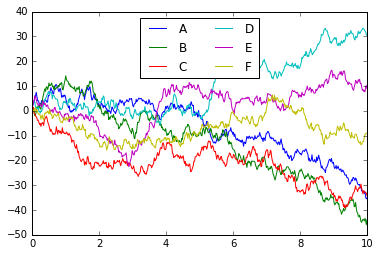

In [5]:
#in matplotlist
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6),0)

plt.plot(x, y)
plt.legend('ABCDEF', ncol= 2, loc = 'upper center');

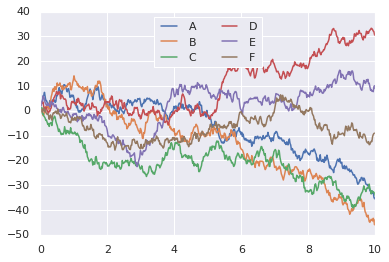

In [6]:
#seaborn
import seaborn as sns
sns.set()

plt.plot(x, y)
plt.legend('ABCDEF',ncol=2, loc = 'upper center');

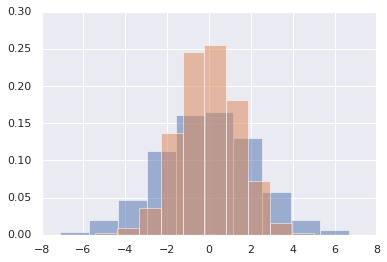

In [7]:
#Exploring Seaborn Plots
#Histograms, KDE, and densities

data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size = 2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
  plt.hist(data[col], density=True, alpha = 0.5)

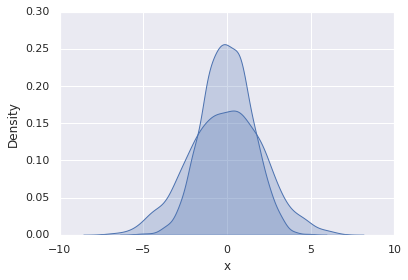

In [8]:
#estimate of the distribution
for col in 'xy':
  sns.kdeplot(data[col], shade=True)

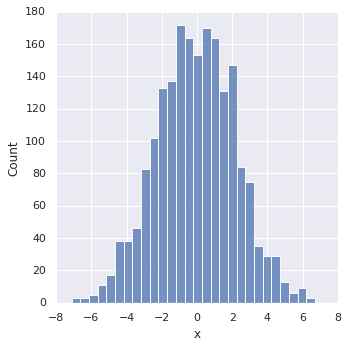

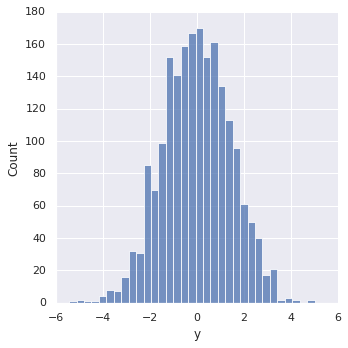

In [9]:
#distplot
sns.displot(data['x'])
sns.displot(data['y']);


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


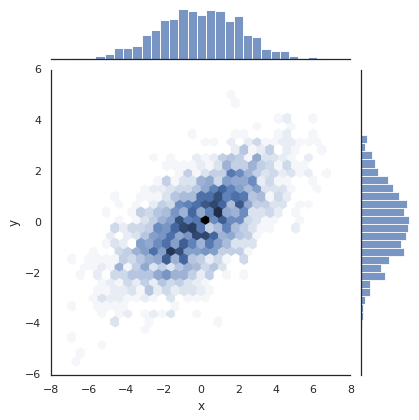

In [10]:
with sns.axes_style('white'):
  sns.jointplot("x", "y", data, kind='hex')

In [11]:
#Pair plots
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


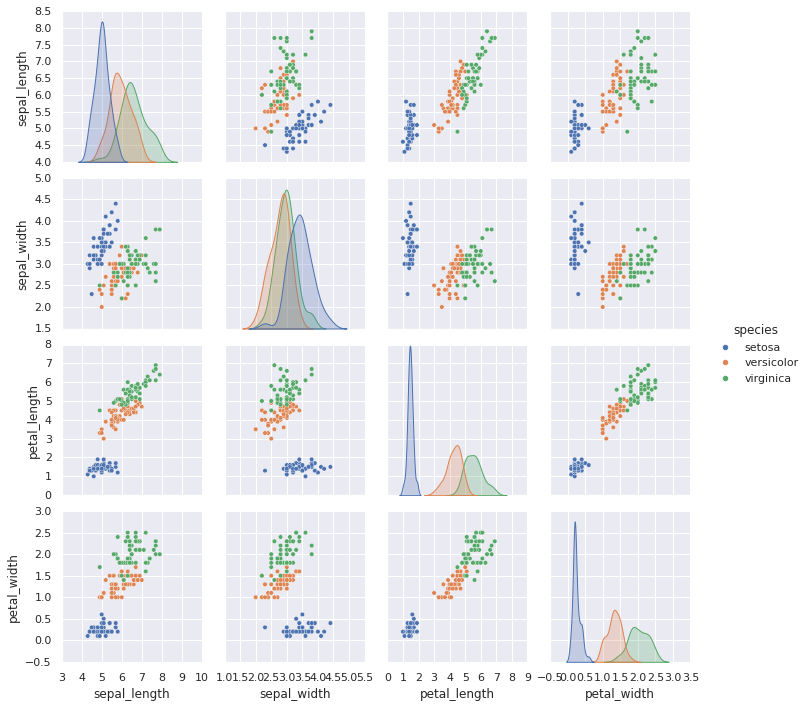

In [12]:
#multidimensional relationships among the samples
sns.pairplot(iris, hue ='species', size = 2.5);

In [13]:
#Faceted histograms
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


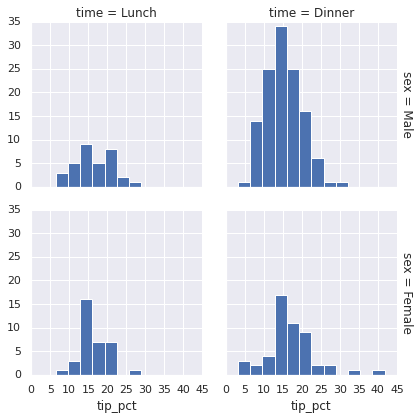

In [14]:
#restaurant staff

tips['tip_pct'] = 100*tips['tip']/ tips['total_bill']


grid = sns.FacetGrid(tips, row = 'sex', col = 'time', margin_titles=True)
grid.map(plt.hist, 'tip_pct', bins = np.linspace(0, 45, 15));

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


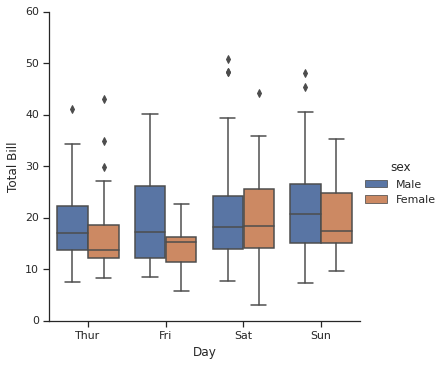

In [15]:
#Factor plots
with sns.axes_style(style='ticks'):
  g = sns.factorplot('day','total_bill', 'sex', data=tips, kind='box')
  g.set_axis_labels('Day', 'Total Bill');

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


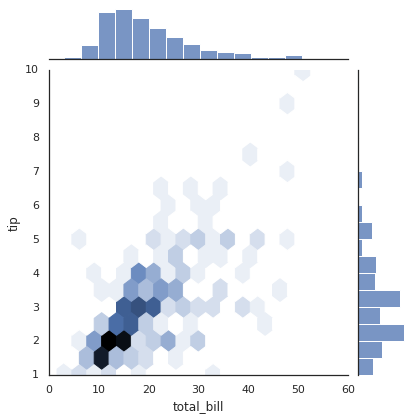

In [16]:
#Joint distributions
with sns.axes_style('white'): 
  sns.jointplot('total_bill', 'tip', data=tips, kind ='hex')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


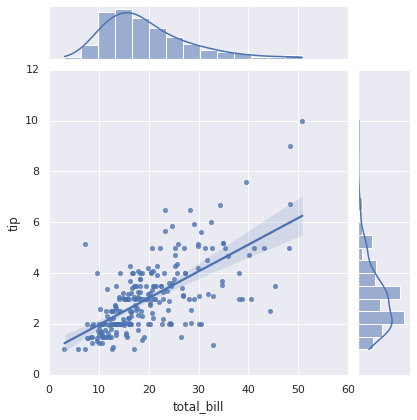

In [17]:
#The joint plot can even do some automatic kernel density estimation and regression
sns.jointplot('total_bill', 'tip', data = tips, kind='reg');

In [18]:
#Bar plots
#we’ll use the Planets data

planets = sns.load_dataset('planets')
planets.head(10)

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009
5,Radial Velocity,1,185.840,4.80,76.39,2008
6,Radial Velocity,1,1773.400,4.64,18.15,2002
7,Radial Velocity,1,798.500,NaN,21.41,1996
8,Radial Velocity,1,993.300,10.30,73.10,2008
9,Radial Velocity,2,452.800,1.99,74.79,2010


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


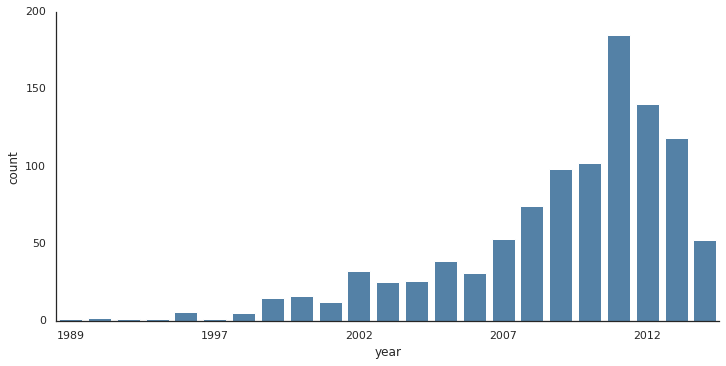

In [19]:
with sns.axes_style('white'):
  g = sns.factorplot('year', data=planets, aspect=2, kind = 'count', color = 'steelblue')
  g.set_xticklabels(step = 5);

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


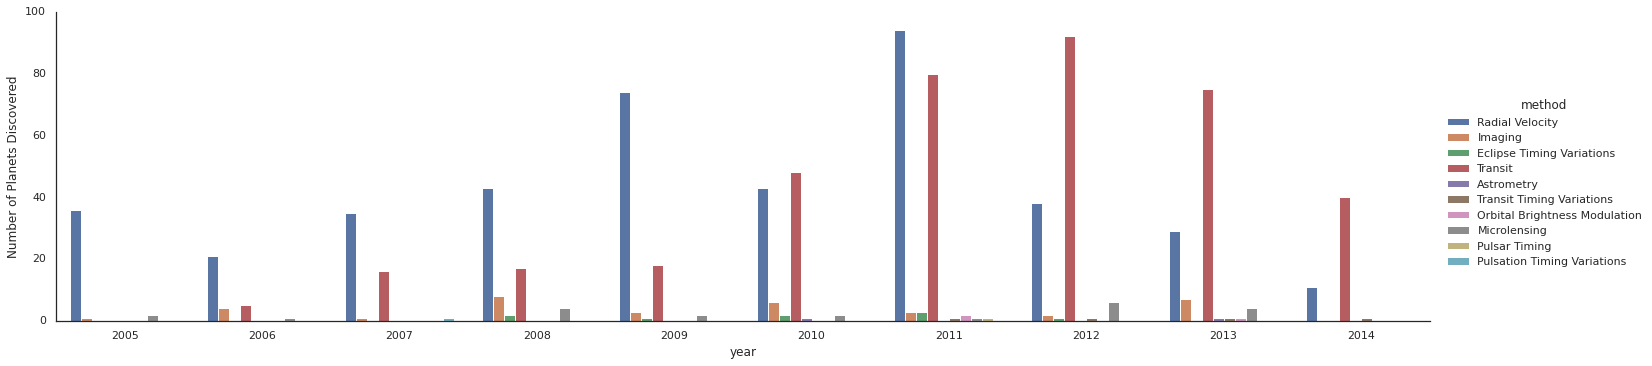

In [20]:
with sns.axes_style('white'):
  g = sns.factorplot('year', data= planets, aspect=4.0, kind='count', hue='method', order= range(2005, 2015))
  g.set_ylabels('Number of Planets Discovered');

In [21]:
#Example: Exploring Marathon Finishing Times
data = pd.read_csv('https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv')
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [24]:
import datetime

def convert_time(s):
    h, m, s = map(int, s.split(':'))
    return datetime.timedelta(hours=h, minutes=m, seconds=s)

data = pd.read_csv('https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv',
                   converters={'split':convert_time, 'final':convert_time})
data.head()

,age,gender,split,final
0,33,M,0 days 01:05:38,0 days 02:08:51
1,32,M,0 days 01:06:26,0 days 02:09:28
2,31,M,0 days 01:06:49,0 days 02:10:42
3,38,M,0 days 01:06:16,0 days 02:13:45
4,31,M,0 days 01:06:32,0 days 02:13:59


In [ ]:
;